<a href="https://colab.research.google.com/github/Jvlia17/neural-networks/blob/main/Sieci_neuronowe_Projekt.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Projekt ten ma na celu stworzenie architektury sieci neuronowej oraz wytrenowanie jej wraz z doborem hiperparametrów tak, aby osiągnąć możliwie największe wartości wskazanych metryk.

Wykorzystywany dataset: https://www.kaggle.com/datasets/alessiocorrado99/animals10/data

26 191 elementów

In [1]:
# Potrzebne biblioteki

import pathlib
import PIL.Image as Image
import os
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
import keras
import numpy as np
import pandas as pd
import os
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img,img_to_array
from tensorflow.keras.models import Sequential,Model
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Dense,GlobalAveragePooling2D
from tensorflow.keras.applications import VGG16
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os
import matplotlib.pyplot as plt

plt.rcParams['font.size']=14

from keras.models import Sequential
import time

import tensorflow as tf

from imblearn.over_sampling import RandomOverSampler
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator

from tensorflow.keras.optimizers import Adam
import time

# 1. Pobranie danych

In [2]:
# Usuwanie istniejących folderów

!rm -rf sample_data

# Pobranie danych i wyodrębnienie ich

!wget https://www.dropbox.com/scl/fi/umlj0h521cc9rzeht1qyc/Animals.zip?rlkey=fsdj4wxjov41er8a08md0o6pi&dl=0
!unzip /content/Animals.zip?rlkey=fsdj4wxjov41er8a08md0o6pi

Streaming output truncated to the last 5000 lines.
  inflating: Animals/images/spider/OIP-E5zolQnxkNZoglB9Da8OHAHaE7.jpeg  
  inflating: Animals/images/spider/OIP-e6H3_aCtzXyxuExfwTHcVwHaE8.jpeg  
  inflating: Animals/images/spider/OIP-e6iXA-V3QbOBiNsPY-TfSQHaFj.jpeg  
  inflating: Animals/images/spider/OIP-E89tGEuaZ4wzBvIYvxOEjAHaGL.jpeg  
  inflating: Animals/images/spider/OIP-E-8HCNdrTI2Q-ujYynhRIgHaGZ.jpeg  
  inflating: Animals/images/spider/OIP-e8qNiF8Wvmqb-k9kucrzfAHaF4.jpeg  
  inflating: Animals/images/spider/OIP-e8x0rOA9DEq3agEGbUdwawHaFj.jpeg  
  inflating: Animals/images/spider/OIP-e98qfAwKXAhDWF2DGtrA7gHaFj.jpeg  
  inflating: Animals/images/spider/OIP-e9IDQCZespp1d4zQTNH-lwHaFj.jpeg  
  inflating: Animals/images/spider/OIP-e9Mz3MvWwYqtYwC8bsmxIAHaF0.jpeg  
  inflating: Animals/images/spider/OIP-E9NM2O8ncDHm_M0iuVpfUgHaFj.jpeg  
  inflating: Animals/images/spider/OIP-e9UXRB7FVnKMmSaOmi__FwHaEw.jpeg  
  inflating: Animals/images/spider/OIP-Ea0THN3uA_gVU7hRslUPgQEBDy.jpeg  


# 2. Przygotowanie danych

# 2.1 Sprawdzenie danych

In [3]:
# Sprawdzenie ilości obrazów w folderach

ROOT_DIR = "/content/Animals/images"
number_of_images = {}

for dir in os.listdir(ROOT_DIR):
  number_of_images[dir] = len(os.listdir(os.path.join(ROOT_DIR, dir)))

number_of_images.items()

# plt.bar(srodki_klas, szereg_licznosc[0], width=width)

dict_items([('cow', 1866), ('butterfly', 2112), ('sheep', 1820), ('squirrel', 1862), ('dog', 4863), ('spider', 4821), ('cat', 1668), ('horse', 2623), ('chicken', 3098), ('elephant', 1446)])

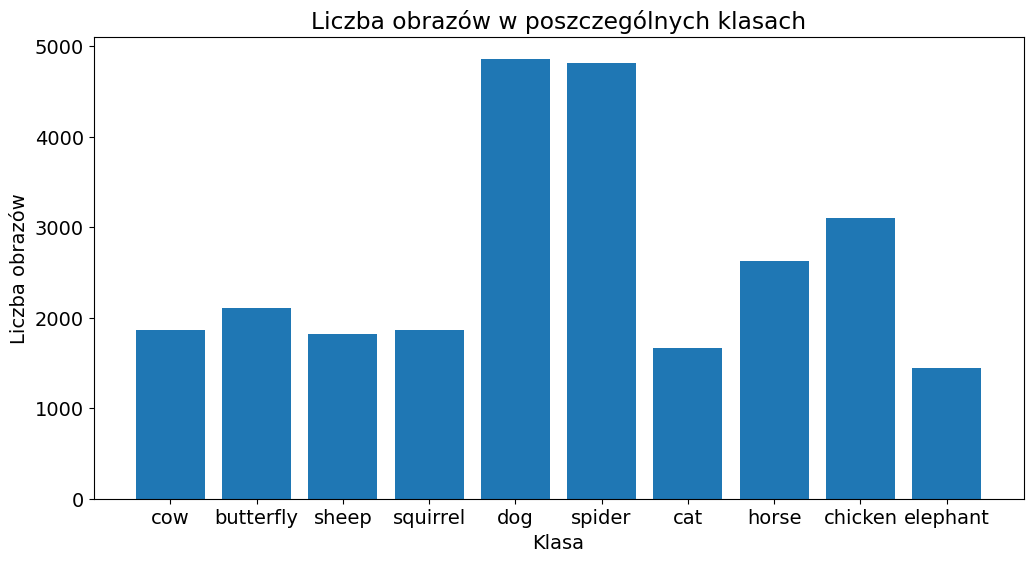

In [4]:
ROOT_DIR = "/content/Animals/images"
number_of_images = {}

for dir in os.listdir(ROOT_DIR):
    number_of_images[dir] = len(os.listdir(os.path.join(ROOT_DIR, dir)))

# Ustaw mniejszy rozmiar wykresu (szerokość x wysokość)
fig, ax = plt.subplots(figsize=(12, 6))
ax.bar(number_of_images.keys(), number_of_images.values())

ax.set_xlabel('Klasa')
ax.set_ylabel('Liczba obrazów')
ax.set_title('Liczba obrazów w poszczególnych klasach')

plt.style.use('ggplot')
plt.show()

oversampling, undersampling - imb learn
albo ważenie klas

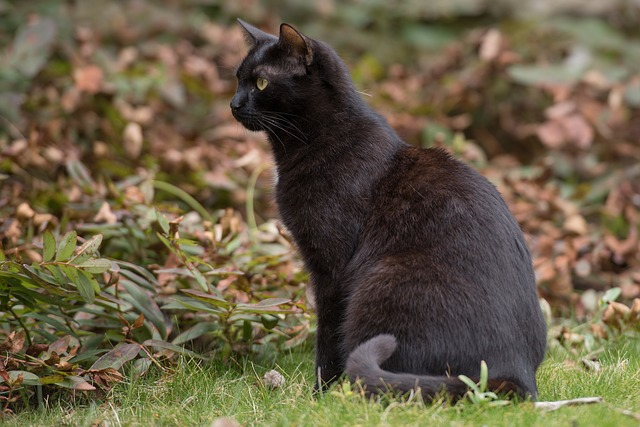

In [5]:
# Wyświetlenie przykładowego obrazu

data_dir='/content/Animals/images'
path_dir=pathlib.Path(data_dir)
sample_img=list(path_dir.glob('cat/*'))[5]
Image.open(sample_img)

In [6]:
img = Image.open(sample_img)
print(img.size)

(640, 427)


# 2.1 Oversampling

In [ ]:
img_size = 224
batch_size = 64
directory = '/content/Animals/images'
num_classes = 10

traingen=ImageDataGenerator(rescale=1/255.,
                           validation_split=.15)

train_dataset=traingen.flow_from_directory(directory,
                                       target_size=(img_size,img_size)
                                       ,batch_size=batch_size,
                                       shuffle=True,class_mode='categorical',
                                      subset='training')

val_dataset=traingen.flow_from_directory(directory,
                                    shuffle=False,batch_size=batch_size,
                                    target_size=(img_size,img_size),
                                    class_mode="categorical",subset='validation')

Found 22257 images belonging to 10 classes.
Found 3922 images belonging to 10 classes.


In [ ]:
class_labels = train_dataset.class_indices
print(class_labels)

{'butterfly': 0, 'cat': 1, 'chicken': 2, 'cow': 3, 'dog': 4, 'elephant': 5, 'horse': 6, 'sheep': 7, 'spider': 8, 'squirrel': 9}


In [ ]:
print("Liczba przykładów w zbiorze treningowym:", train_dataset.samples)
print("Liczba przykładów w zbiorze walidacyjnym:", val_dataset.samples)

Liczba przykładów w zbiorze treningowym: 22257
Liczba przykładów w zbiorze walidacyjnym: 3922


In [ ]:
images, labels = train_dataset[0]
print("Shape of images batch:", images.shape)
print("Shape of labels batch:", labels.shape)

Shape of images batch: (64, 224, 224, 3)
Shape of labels batch: (64, 10)


In [ ]:
train_dataset[0][1][2]

array([0., 0., 0., 0., 0., 0., 0., 0., 1., 0.], dtype=float32)

In [41]:
# ten działa najlepiej

import time
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from imblearn.over_sampling import RandomOverSampler

# Set your image size
# img_size = 224
img_size = 32
batch_size = 8
directory = '/content/Animals/images'
num_classes = 10

traingen = ImageDataGenerator(rescale=1/255., validation_split=0.15)

train_dataset = traingen.flow_from_directory(directory,
                                             target_size=(img_size, img_size),
                                             batch_size=batch_size,
                                             shuffle=True,
                                             class_mode='categorical',
                                             subset='training')

val_dataset = traingen.flow_from_directory(directory,
                                           shuffle=False,
                                           batch_size=batch_size,
                                           target_size=(img_size, img_size),
                                           class_mode="categorical",
                                           subset='validation')

# x_train, y_train = next(train_dataset)
# x_test, y_test = next(val_dataset)

# Przygotowanie modelu
base_model = tf.keras.applications.VGG16(include_top=False,
                                          weights='imagenet',
                                          input_shape=(img_size, img_size, 3))
base_model.trainable = False

# Stworzenie nowego, który się będzie uczył
model = tf.keras.Sequential([
    base_model,
    layers.Flatten(),
    layers.Dense(64, activation='relu', name='dense_1'),
    layers.Dense(64, activation='relu', name='dense_2'),
    layers.Dense(num_classes, activation='softmax', name='predictions')
])

optimizer = keras.optimizers.SGD(learning_rate=1e-3)

loss_fn = keras.losses.CategoricalCrossentropy()

train_acc_metric = keras.metrics.CategoricalAccuracy()
val_acc_metric = keras.metrics.CategoricalAccuracy()

oversample = RandomOverSampler()

@tf.function
def train_step(x, y):
    with tf.GradientTape() as tape:
        logits = model(x, training=True)
        loss_value = loss_fn(y, logits)
    grads = tape.gradient(loss_value, model.trainable_weights)
    optimizer.apply_gradients(zip(grads, model.trainable_weights))
    train_acc_metric.update_state(y, logits)
    return loss_value

@tf.function
def test_step(x, y):
    val_logits = model(x, training=False)
    val_acc_metric.update_state(y, val_logits)

epochs = 2
for epoch in range(epochs):
    print("\nStart of epoch %d" % (epoch,))
    start_time = time.time()

    # Iteracja przez batche
    for step, (x_batch_train, y_batch_train) in enumerate(train_dataset):

        # Oversampling
        x_batch_train_resampled, y_batch_train_resampled = oversample.fit_resample(x_batch_train.reshape(-1, img_size * img_size * 3),
                                                                                   y_batch_train.argmax(axis=1))

        print(y_batch_train.argmax(axis=1))

        y_batch_train_resampled_onehot = tf.keras.utils.to_categorical(y_batch_train_resampled, num_classes=num_classes)
        x_batch_train_resampled_reshaped = x_batch_train_resampled.reshape(-1, img_size, img_size, 3)

        loss_value = train_step(x_batch_train_resampled_reshaped, y_batch_train_resampled_onehot)

        if step % 200 == 0:
            print(
                "Training loss (for one batch) at step %d: %.4f"
                % (step, float(loss_value))
            )
            print("Seen so far: %d samples" % ((step + 1) * batch_size))


    train_acc = train_acc_metric.result()
    print("Training acc over epoch: %.4f" % (float(train_acc),))

    train_acc_metric.reset_states()

    for x_batch_val, y_batch_val in val_dataset:
        test_step(x_batch_val, y_batch_val)

    val_acc = val_acc_metric.result()
    val_acc_metric.reset_states()
    print("Validation acc: %.4f" % (float(val_acc),))
    print("Time taken: %.2fs" % (time.time() - start_time))

Found 22257 images belonging to 10 classes.
Found 3922 images belonging to 10 classes.

Start of epoch 0
[4 9 6 9 7 8 4 2]
Training loss (for one batch) at step 0: 2.5500
Seen so far: 8 samples
[4 4 7 4 7 3 4 4]
[7 0 7 7 2 4 0 2]
[9 4 9 6 4 1 6 3]
[4 4 1 4 1 0 6 9]
[8 0 4 1 3 8 4 7]
[1 2 1 3 8 8 8 7]
[8 8 1 2 4 3 8 5]
[8 5 8 3 1 9 0 2]


[7 1 7 0 8 4 6 2]
[9 6 8 3 9 8 6 0]
[4 0 9 8 4 2 4 3]
[8 8 6 6 7 2 4 8]
[8 8 4 3 8 4 6 6]
[9 2 7 6 4 2 8 8]
[6 6 6 0 2 2 5 4]
[0 8 2 9 7 9 8 5]
[9 7 6 8 4 2 4 3]
[6 5 3 4 3 1 0 9]
[8 8 8 2 6 4 6 8]
[3 4 3 7 8 0 8 4]
[4 6 3 1 5 7 8 2]
[4 6 4 6 9 9 8 1]
[8 4 0 2 0 9 1 3]
[9 6 7 0 8 7 0 6]
[8 4 3 8 4 2 4 8]
[3 4 5 5 5 8 7 2]
[8 4 4 7 9 9 0 8]
[5 2 8 2 8 1 8 5]
[8 0 8 5 8 3 0 2]
[4 1 9 1 7 4 5 4]
[4 4 4 9 3 3 8 0]
[8 8 8 5 2 2 5 8]
[0 7 8 8 2 2 7 8]
[2 9 7 1 0 9 4 7]
[6 8 8 7 1 8 8 8]
[4 8 2 9 7 4 4 7]
[8 8 6 7 6 4 8 8]
[0 1 8 4 8 1 2 7]
[0 4 0 8 8 3 8 3]
[6 2 5 8 8 8 2 8]
[1 6 7 8 8 4 2 7]
[5 2 6 7 5 5 4 8]
[4 1 6 0 8 7 6 8]
[4 4 8 5 8 7 8 4]
[6 5 8 2 3 4 9 3]
[3 9 4 3 6 8 5 8]
[2 1 5 3 4 8 7 3]
[8 3 2 3 2 8 8 6]
[4 8 6 0 4 4 6 2]
[5 2 8 1 4 8 6 4]
[0 0 4 2 3 0 1 8]
[7 4 9 2 6 4 4 5]
[2 0 8 3 7 4 7 0]
[2 8 6 9 6 2 4 2]
[2 8 8 0 6 2 9 9]
[6 3 8 7 9 2 0 9]
[3 6 7 8 7 9 4 8]
[8 2 4 8 7 4 6 2]
[3 4 8 5 4 5 8 8]
[4 2 7 2 6 3 2 9]
[4 6 1 8 2 1 0 4]
[4 2 2 8 2 8 6 3]
[4 2 6 4 5 0 8 9]
[4 5 4 2 2

ValueError: ignored

In [ ]:
print(type(train_dataset))

<class 'keras.src.preprocessing.image.DirectoryIterator'>


In [ ]:
# Train the model using the oversampled data
model.fit(X_resampled, y_resampled_categorical, epochs=100, validation_data=valdata, callbacks=[checkpoint, earlystopping])

Epoch 1/100


KeyboardInterrupt: ignored

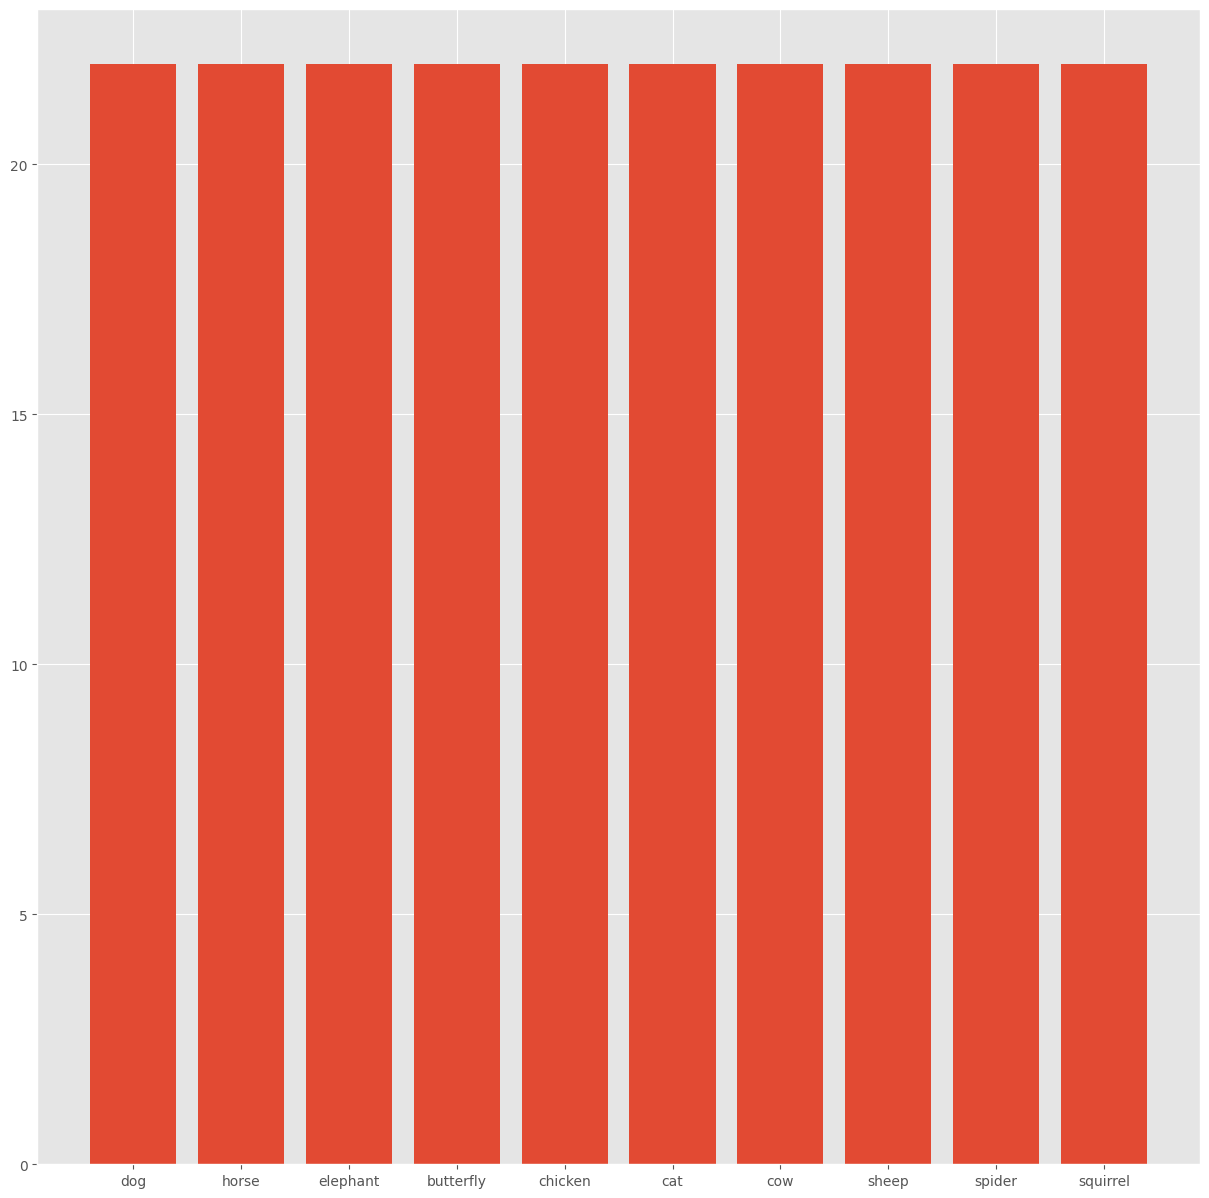

In [ ]:
binarr = []
for i in range(0,10):
    binarr.append(np.count_nonzero(y_resampled==i))

labels = ['dog', 'horse', 'elephant', 'butterfly', 'chicken', 'cat', 'cow', 'sheep', 'spider', 'squirrel']
plt.figure(figsize=(15, 15))
plt.bar(labels, binarr)
plt.show()

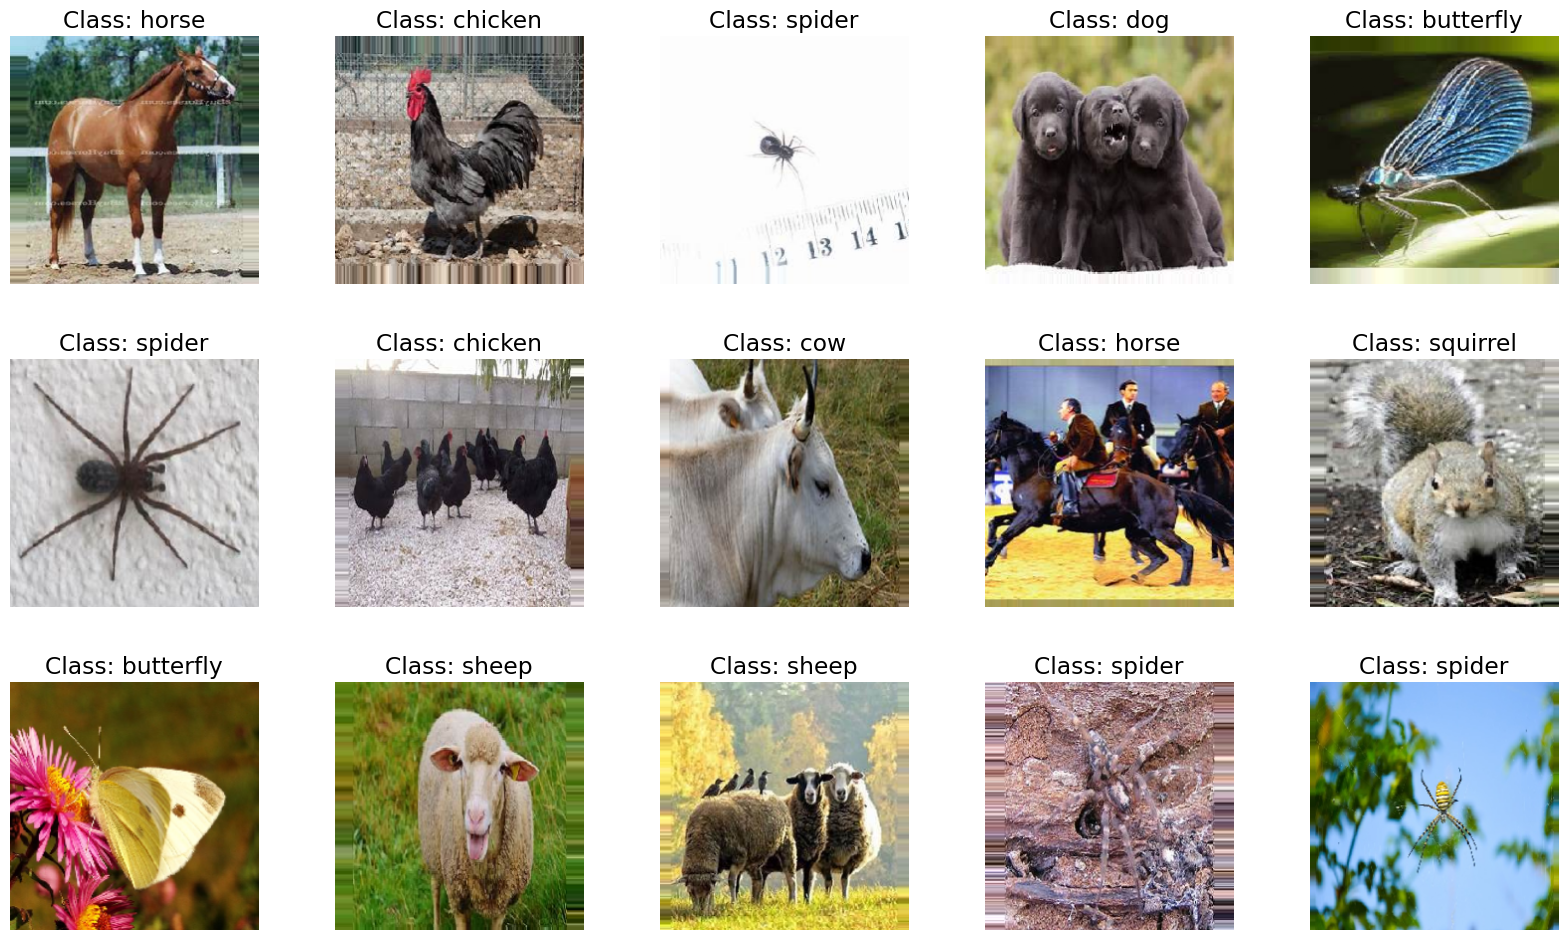

In [ ]:
labels=[key for key in traindata.class_indices]
samples=traindata.__next__()
images=samples[0]
target=samples[1]
plt.rcParams['figure.figsize']=(20,20)

for i in range(15):
    plt.subplot(5,5,i+1)
    plt.subplots_adjust(hspace=0.3,wspace=.3)
    plt.imshow(images[i])
    plt.title(f"Class: {labels[np.argmax(target[i],axis=0)]}")
    plt.axis('off')

# 3.1 Wybrany model - VGG16

https://www.kaggle.com/code/atishaygwari/transfer-learning-vgg16-93

porownanie naszej, a tej z transfer learningu

intuicyjne parametry, adaptive learning

In [ ]:
img_size=224
model=tf.keras.applications.vgg16.VGG16(include_top=False,
                                             weights='imagenet',
                                             input_shape=(img_size,img_size,3))

58889256/58889256 [==============================] - 4s 0us/step


In [ ]:
model.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [ ]:
# freezujemy 4 ostatnie warstwy modelu

for layer in model.layers[:-4]:
    layer.trainable=False

In [ ]:
model.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [ ]:
from tensorflow.keras.optimizers import Adam
last_output = model.output
x = GlobalAveragePooling2D()(last_output)
x = Dense(128,activation="relu")(x)
x = Dense(512,activation="relu")(x)
outputs = Dense(10,activation="softmax")(x) # zmieniamy na 10 kategorii bo 10 zwierzatek
model = Model(inputs=model.inputs,outputs=outputs)
model.compile(optimizer=Adam(learning_rate=0.0001),loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [ ]:
model_name = "model.h5"
checkpoint = tf.keras.callbacks.ModelCheckpoint(model_name,
                            monitor="val_loss",
                            mode="min",
                            save_best_only = True,
                            verbose=1)

earlystopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss',min_delta = 0, patience = 5, verbose = 1, restore_best_weights=True)

In [ ]:
history = model.fit(traindata,epochs=15,validation_data=valdata,callbacks=[checkpoint,earlystopping])

Epoch 1/15
696/696 [==============================] - ETA: 0s - loss: 0.7306 - accuracy: 0.7534
Epoch 1: val_loss improved from inf to 0.47069, saving model to model.h5


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


696/696 [==============================] - 489s 681ms/step - loss: 0.7306 - accuracy: 0.7534 - val_loss: 0.4707 - val_accuracy: 0.8427
Epoch 2/15
696/696 [==============================] - ETA: 0s - loss: 0.3558 - accuracy: 0.8855
Epoch 2: val_loss improved from 0.47069 to 0.29060, saving model to model.h5
696/696 [==============================] - 459s 659ms/step - loss: 0.3558 - accuracy: 0.8855 - val_loss: 0.2906 - val_accuracy: 0.9113


KeyboardInterrupt: ignored

In [ ]:
# model = tf.keras.models.load_model("/kaggle/working/model.h5")

# 4.1 Wyniki dla VGG

In [ ]:
plt.figure(figsize=(20,8))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [ ]:
y_test = valdata.classes
y_pred = model.predict(valdata)
y_pred = np.argmax(y_pred,axis=1)

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_test,y_pred,target_names = labels))

# 3.2 Wybrany model - MobileNetV3 / ResNet

też porownanie naszej, a transfer learning

https://towardsdatascience.com/transfer-learning-using-mobilenet-and-keras-c75daf7ff299

In [ ]:
# nie wszystkie potrzebne
import keras
from keras import backend as K
from keras.optimizers import Adam
from keras.metrics import categorical_crossentropy
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing import image
from keras.models import Model
from keras.applications import imagenet_utils
from keras.layers import Dense,GlobalAveragePooling2D
from keras.applications import MobileNet
from keras.applications.mobilenet import preprocess_input
import numpy as np
from IPython.display import Image
from keras.optimizers import Adam

In [ ]:
mobile = keras.applications.mobilenet.MobileNet()
def prepare_image(file):
    img_path = ''
    img = image.load_img(img_path + file, target_size=(224, 224))
    img_array = image.img_to_array(img)
    img_array_expanded_dims = np.expand_dims(img_array, axis=0)
    return keras.applications.mobilenet.preprocess_input(img_array_expanded_dims)

In [ ]:
preprocessed_image = prepare_image('/content/Animals/images/cat/100.jpeg')
predictions = mobile.predict(preprocessed_image)
results = imagenet_utils.decode_predictions(predictions)
results

XXXXXXXXXXXXXXXXXXXXXXXXXXX PROBA NA MNIST XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX

In [ ]:
import tensorflow as tf
import keras
from keras import layers
import numpy as np

In [ ]:
# Instantiate an optimizer.
optimizer = keras.optimizers.SGD(learning_rate=1e-3)
# Instantiate a loss function.
loss_fn = keras.losses.SparseCategoricalCrossentropy(from_logits=True)

# Prepare the training dataset.
batch_size = 64
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()
x_train = np.reshape(x_train, (-1, 784))
x_test = np.reshape(x_test, (-1, 784))

# Reserve 10,000 samples for validation.
x_val = x_train[-10000:]
y_val = y_train[-10000:]
x_train = x_train[:-10000]
y_train = y_train[:-10000]

# Prepare the training dataset.
train_dataset = tf.data.Dataset.from_tensor_slices((x_train, y_train))
train_dataset = train_dataset.shuffle(buffer_size=1024).batch(batch_size)

# Prepare the validation dataset.
val_dataset = tf.data.Dataset.from_tensor_slices((x_val, y_val))
val_dataset = val_dataset.batch(batch_size)

In [ ]:
# Get model
inputs = keras.Input(shape=(784,), name="digits")
x = layers.Dense(64, activation="relu", name="dense_1")(inputs)
x = layers.Dense(64, activation="relu", name="dense_2")(x)
outputs = layers.Dense(10, name="predictions")(x)
model = keras.Model(inputs=inputs, outputs=outputs)

# Instantiate an optimizer to train the model.
optimizer = keras.optimizers.SGD(learning_rate=1e-3)
# Instantiate a loss function.
loss_fn = keras.losses.SparseCategoricalCrossentropy(from_logits=True)

# Prepare the metrics.
train_acc_metric = keras.metrics.SparseCategoricalAccuracy()
val_acc_metric = keras.metrics.SparseCategoricalAccuracy()

In [ ]:
import time

epochs = 2
for epoch in range(epochs):
    print("\nStart of epoch %d" % (epoch,))
    start_time = time.time()

    # Iterate over the batches of the dataset.
    for step, (x_batch_train, y_batch_train) in enumerate(train_dataset):
        with tf.GradientTape() as tape:
            logits = model(x_batch_train, training=True)
            loss_value = loss_fn(y_batch_train, logits)
        grads = tape.gradient(loss_value, model.trainable_weights)
        optimizer.apply_gradients(zip(grads, model.trainable_weights))

        # Update training metric.
        train_acc_metric.update_state(y_batch_train, logits)

        # Log every 200 batches.
        if step % 200 == 0:
            print(
                "Training loss (for one batch) at step %d: %.4f"
                % (step, float(loss_value))
            )
            print("Seen so far: %d samples" % ((step + 1) * batch_size))

    # Display metrics at the end of each epoch.
    train_acc = train_acc_metric.result()
    print("Training acc over epoch: %.4f" % (float(train_acc),))

    # Reset training metrics at the end of each epoch
    train_acc_metric.reset_states()

    # Run a validation loop at the end of each epoch.
    for x_batch_val, y_batch_val in val_dataset:
        val_logits = model(x_batch_val, training=False)
        # Update val metrics
        val_acc_metric.update_state(y_batch_val, val_logits)
    val_acc = val_acc_metric.result()
    val_acc_metric.reset_states()
    print("Validation acc: %.4f" % (float(val_acc),))
    print("Time taken: %.2fs" % (time.time() - start_time))


Start of epoch 0
Training loss (for one batch) at step 0: 116.3027
Seen so far: 64 samples
Training loss (for one batch) at step 200: 1.2309
Seen so far: 12864 samples
Training loss (for one batch) at step 400: 1.4459
Seen so far: 25664 samples
Training loss (for one batch) at step 600: 0.5751
Seen so far: 38464 samples
Training acc over epoch: 0.7316
Validation acc: 0.8349
Time taken: 20.72s

Start of epoch 1
Training loss (for one batch) at step 0: 0.5637
Seen so far: 64 samples
Training loss (for one batch) at step 200: 0.5013
Seen so far: 12864 samples
Training loss (for one batch) at step 400: 0.4374
Seen so far: 25664 samples
Training loss (for one batch) at step 600: 0.5730
Seen so far: 38464 samples
Training acc over epoch: 0.8454
Validation acc: 0.8729
Time taken: 12.98s


In [ ]:
# oversampling w każdym epochu

oversampler = RandomOverSampler()

epochs = 2
for epoch in range(epochs):
    print("\nStart of epoch %d" % (epoch,))
    start_time = time.time()

    # Oversample the training data in each epoch.
    x_train_resampled, y_train_resampled = oversampler.fit_resample(x_train, y_train)
    train_dataset = tf.data.Dataset.from_tensor_slices((x_train_resampled, y_train_resampled))
    train_dataset = train_dataset.shuffle(buffer_size=1024).batch(batch_size)

    # Iterate over the batches of the dataset.
    for step, (x_batch_train, y_batch_train) in enumerate(train_dataset):
        with tf.GradientTape() as tape:
            logits = model(x_batch_train, training=True)
            loss_value = loss_fn(y_batch_train, logits)
        grads = tape.gradient(loss_value, model.trainable_weights)
        optimizer.apply_gradients(zip(grads, model.trainable_weights))

        # Update training metric.
        train_acc_metric.update_state(y_batch_train, logits)

        # Log every 200 batches.
        if step % 200 == 0:
            print(
                "Training loss (for one batch) at step %d: %.4f"
                % (step, float(loss_value))
            )
            print("Seen so far: %d samples" % ((step + 1) * batch_size))

    # Display metrics at the end of each epoch.
    train_acc = train_acc_metric.result()
    print("Training acc over epoch: %.4f" % (float(train_acc),))

    # Reset training metrics at the end of each epoch
    train_acc_metric.reset_states()

    # Run a validation loop at the end of each epoch.
    for x_batch_val, y_batch_val in val_dataset:
        val_logits = model(x_batch_val, training=False)
        # Update val metrics
        val_acc_metric.update_state(y_batch_val, val_logits)
    val_acc = val_acc_metric.result()
    val_acc_metric.reset_states()
    print("Validation acc: %.4f" % (float(val_acc),))
    print("Time taken: %.2fs" % (time.time() - start_time))


Start of epoch 0
Training loss (for one batch) at step 0: 0.5730
Seen so far: 64 samples
Training loss (for one batch) at step 200: 0.4752
Seen so far: 12864 samples
Training loss (for one batch) at step 400: 0.6117
Seen so far: 25664 samples
Training loss (for one batch) at step 600: 0.4437
Seen so far: 38464 samples
Training loss (for one batch) at step 800: 0.3709
Seen so far: 51264 samples
Training acc over epoch: 0.8782
Validation acc: 0.8295
Time taken: 21.55s

Start of epoch 1
Training loss (for one batch) at step 0: 1.0464
Seen so far: 64 samples
Training loss (for one batch) at step 200: 0.5712
Seen so far: 12864 samples
Training loss (for one batch) at step 400: 0.3392
Seen so far: 25664 samples
Training loss (for one batch) at step 600: 0.3028
Seen so far: 38464 samples
Training loss (for one batch) at step 800: 0.4995
Seen so far: 51264 samples
Training acc over epoch: 0.8943
Validation acc: 0.8446
Time taken: 15.11s


In [ ]:
oversampler = RandomOverSampler()

epochs = 2
for epoch in range(epochs):
    print("\nStart of epoch %d" % (epoch,))
    start_time = time.time()

    # Iterate over the batches of the dataset.
    for step, (x_batch_train, y_batch_train) in enumerate(train_dataset):

        # Apply oversampling to the current batch.
        x_batch_resampled, y_batch_resampled = oversampler.fit_resample(x_batch_train, y_batch_train)

        with tf.GradientTape() as tape:
            logits = model(x_batch_resampled, training=True)
            loss_value = loss_fn(y_batch_resampled, logits)
        grads = tape.gradient(loss_value, model.trainable_weights)
        optimizer.apply_gradients(zip(grads, model.trainable_weights))

        # Update training metric.
        train_acc_metric.update_state(y_batch_resampled, logits)

        # Log every 200 batches.
        if step % 200 == 0:
            print(
                "Training loss (for one batch) at step %d: %.4f"
                % (step, float(loss_value))
            )
            print("Seen so far: %d samples" % ((step + 1) * batch_size))

    # Display metrics at the end of each epoch.
    train_acc = train_acc_metric.result()
    print("Training acc over epoch: %.4f" % (float(train_acc),))

    # Reset training metrics at the end of each epoch
    train_acc_metric.reset_states()

    # Run a validation loop at the end of each epoch.
    for x_batch_val, y_batch_val in val_dataset:
        val_logits = model(x_batch_val, training=False)
        # Update val metrics
        val_acc_metric.update_state(y_batch_val, val_logits)
    val_acc = val_acc_metric.result()
    val_acc_metric.reset_states()
    print("Validation acc: %.4f" % (float(val_acc),))
    print("Time taken: %.2fs" % (time.time() - start_time))


Start of epoch 0
Training loss (for one batch) at step 0: 94.9886
Seen so far: 64 samples
Training loss (for one batch) at step 200: 1.0668
Seen so far: 12864 samples
Training loss (for one batch) at step 400: 1.6762
Seen so far: 25664 samples
Training loss (for one batch) at step 600: 0.5322
Seen so far: 38464 samples
Training acc over epoch: 0.7232
Validation acc: 0.8092
Time taken: 14.90s

Start of epoch 1
Training loss (for one batch) at step 0: 0.4880
Seen so far: 64 samples
Training loss (for one batch) at step 200: 0.5859
Seen so far: 12864 samples
Training loss (for one batch) at step 400: 0.2985
Seen so far: 25664 samples
Training loss (for one batch) at step 600: 1.0535
Seen so far: 38464 samples
Training acc over epoch: 0.8425
Validation acc: 0.8719
Time taken: 21.17s
